Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type

Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic

trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

thalach : maximum heart rate achieved

target : 0= less chance of heart attack 1= more chance of heart attack

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings("ignore")

In [ ]:
import os
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, r2_score, auc

In [ ]:
df = pd.read_csv('heart.csv')

In [ ]:
satura = pd.read_csv("o2Saturation.csv")

In [ ]:
df.shape

(303, 14)

In [ ]:
satura.shape

(3585, 1)

In [ ]:
satura.head()

,98.6
0,98.6
1,98.6
2,98.6
3,98.1
4,97.5


In [ ]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

1    54.455446
0    45.544554
Name: output, dtype: float64


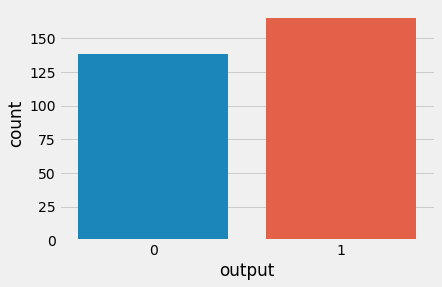

In [ ]:
sns.countplot(df.output)
print(df.output.value_counts()/len(df)*100)

1    165
0    138
Name: output, dtype: int64


Text(0.5, 1.0, 'Distribution of target values')

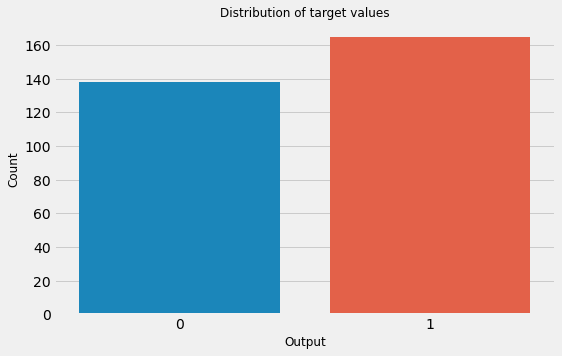

In [ ]:
print(df['output'].value_counts())
plt.figure(figsize = (8, 5))
sns.countplot(x = df['output'])
plt.xlabel("Output", size = 12)
plt.ylabel("Count", size = 12)
plt.title("Distribution of target values", size = 12)

<AxesSubplot:xlabel='age', ylabel='Count'>

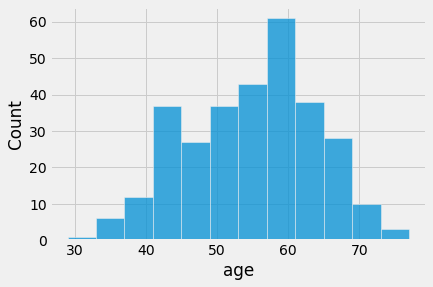

In [ ]:
sns.histplot(df.age)

1    68.316832
0    31.683168
Name: sex, dtype: float64


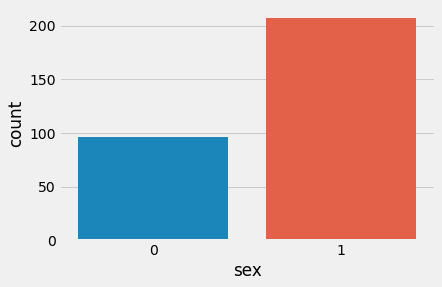

In [ ]:
sns.countplot(df.sex)
print(df.sex.value_counts()/len(df)*100)

<AxesSubplot:xlabel='thalachh', ylabel='Count'>

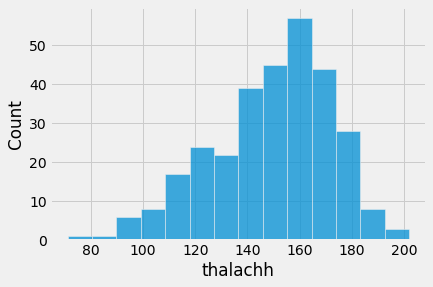

In [ ]:
#thalachh = maximum heart rate achieved
sns.histplot(df.thalachh)

<AxesSubplot:xlabel='chol', ylabel='Count'>

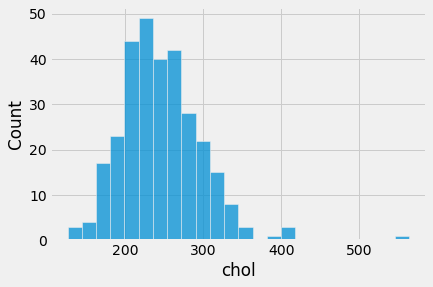

In [ ]:
#chol : cholestoral in mg/dl fetched via BMI sensor
sns.histplot(df.chol)

<AxesSubplot:xlabel='cp', ylabel='count'>

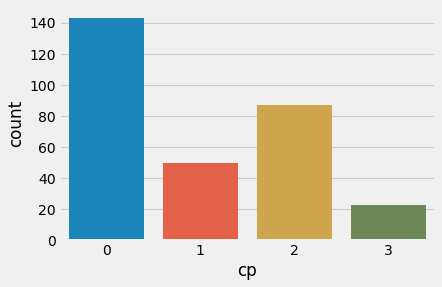

In [ ]:
#cp : Chest Pain type chest pain type
sns.countplot(df.cp)

In [ ]:
# Create bins for age and group them
# Aggregate by sum()
df.groupby(pd.cut(df.age,[25,35,45,55,65,75,85])).sum().sort_values('output', ascending=False)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,,,,,,,,,,,,,,
"(45, 55]",4504,62,89,11366,21569,14,51,13324,28,78.1,130,50,204,55
"(55, 65]",7070,79,98,16046,29876,22,53,17044,45,156.5,153,110,281,45
"(35, 45]",2398,41,65,7062,13243,3,36,9283,13,38.8,86,22,125,43
"(65, 75]",2111,19,33,4271,7978,6,14,4204,10,36.8,39,36,71,16
"(25, 35]",237,5,6,872,1451,0,4,1210,2,3.7,13,0,16,5
"(75, 85]",153,1,2,265,501,0,2,278,1,1.1,3,3,4,1


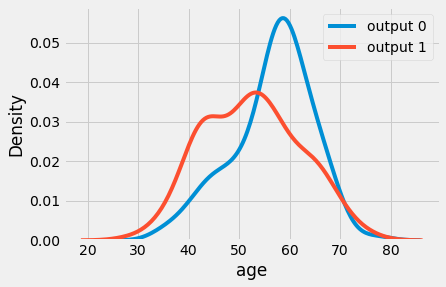

In [ ]:
sns.kdeplot(df.loc[df['output'] == 0, 'age'], label = 'output 0')
sns.kdeplot(df.loc[df['output'] == 1, 'age'], label = 'output 1')
plt.legend()

In [ ]:
# Aggregate by Count()
df.groupby(pd.cut(df.age,[25,35,45,55,65,75,85])).count().sort_values('output', ascending=False)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,,,,,,,,,,,,,,
"(55, 65]",118,118,118,118,118,118,118,118,118,118,118,118,118,118
"(45, 55]",88,88,88,88,88,88,88,88,88,88,88,88,88,88
"(35, 45]",57,57,57,57,57,57,57,57,57,57,57,57,57,57
"(65, 75]",31,31,31,31,31,31,31,31,31,31,31,31,31,31
"(25, 35]",7,7,7,7,7,7,7,7,7,7,7,7,7,7
"(75, 85]",2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [ ]:
df_age = df.groupby(pd.cut(df.age,[25,35,45,55,65,75,85])).sum().sort_values('output', ascending=False)
df_age['total_count'] = df.groupby(pd.cut(df.age,[25,35,45,55,65,75,85])).count().sort_values('output', ascending=False)['output']
df_age['percentage'] = df_age['output'] / df_age['total_count'] * 100
df_age = df_age[['output','total_count','percentage']]
df_age

,output,total_count,percentage
age,,,
"(45, 55]",55,88,62.500000
"(55, 65]",45,118,38.135593
"(35, 45]",43,57,75.438596
"(65, 75]",16,31,51.612903
"(25, 35]",5,7,71.428571
"(75, 85]",1,2,50.000000


<AxesSubplot:xlabel='age', ylabel='Count'>

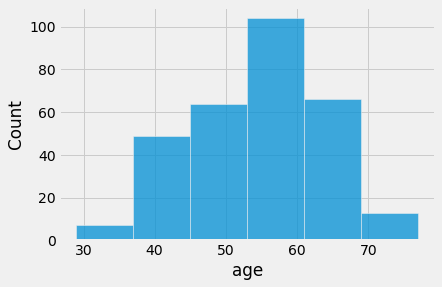

In [ ]:
sns.histplot(df.age,bins=6)

In [ ]:
df.groupby('sex').mean()

,age,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
sex,,,,,,,,,,,,,
0,55.677083,1.041667,133.083333,261.302083,0.12500,0.572917,151.125000,0.229167,0.876042,1.427083,0.552083,2.125000,0.750000
1,53.758454,0.932367,130.946860,239.289855,0.15942,0.507246,148.961353,0.371981,1.115459,1.386473,0.811594,2.400966,0.449275


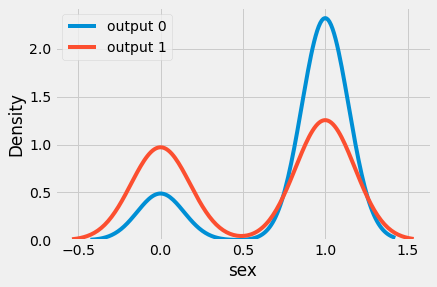

In [ ]:
sns.kdeplot(df.loc[df['output'] == 0, 'sex'], label = 'output 0')
sns.kdeplot(df.loc[df['output'] == 1, 'sex'], label = 'output 1')
plt.legend()

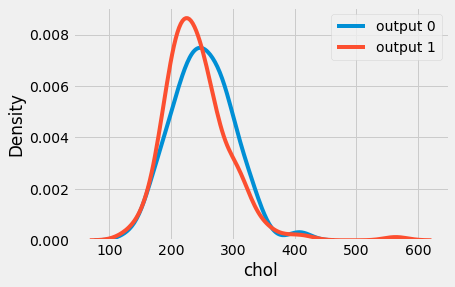

In [ ]:
sns.kdeplot(df.loc[df['output'] == 0, 'chol'], label = 'output 0')
sns.kdeplot(df.loc[df['output'] == 1, 'chol'], label = 'output 1')
plt.legend()

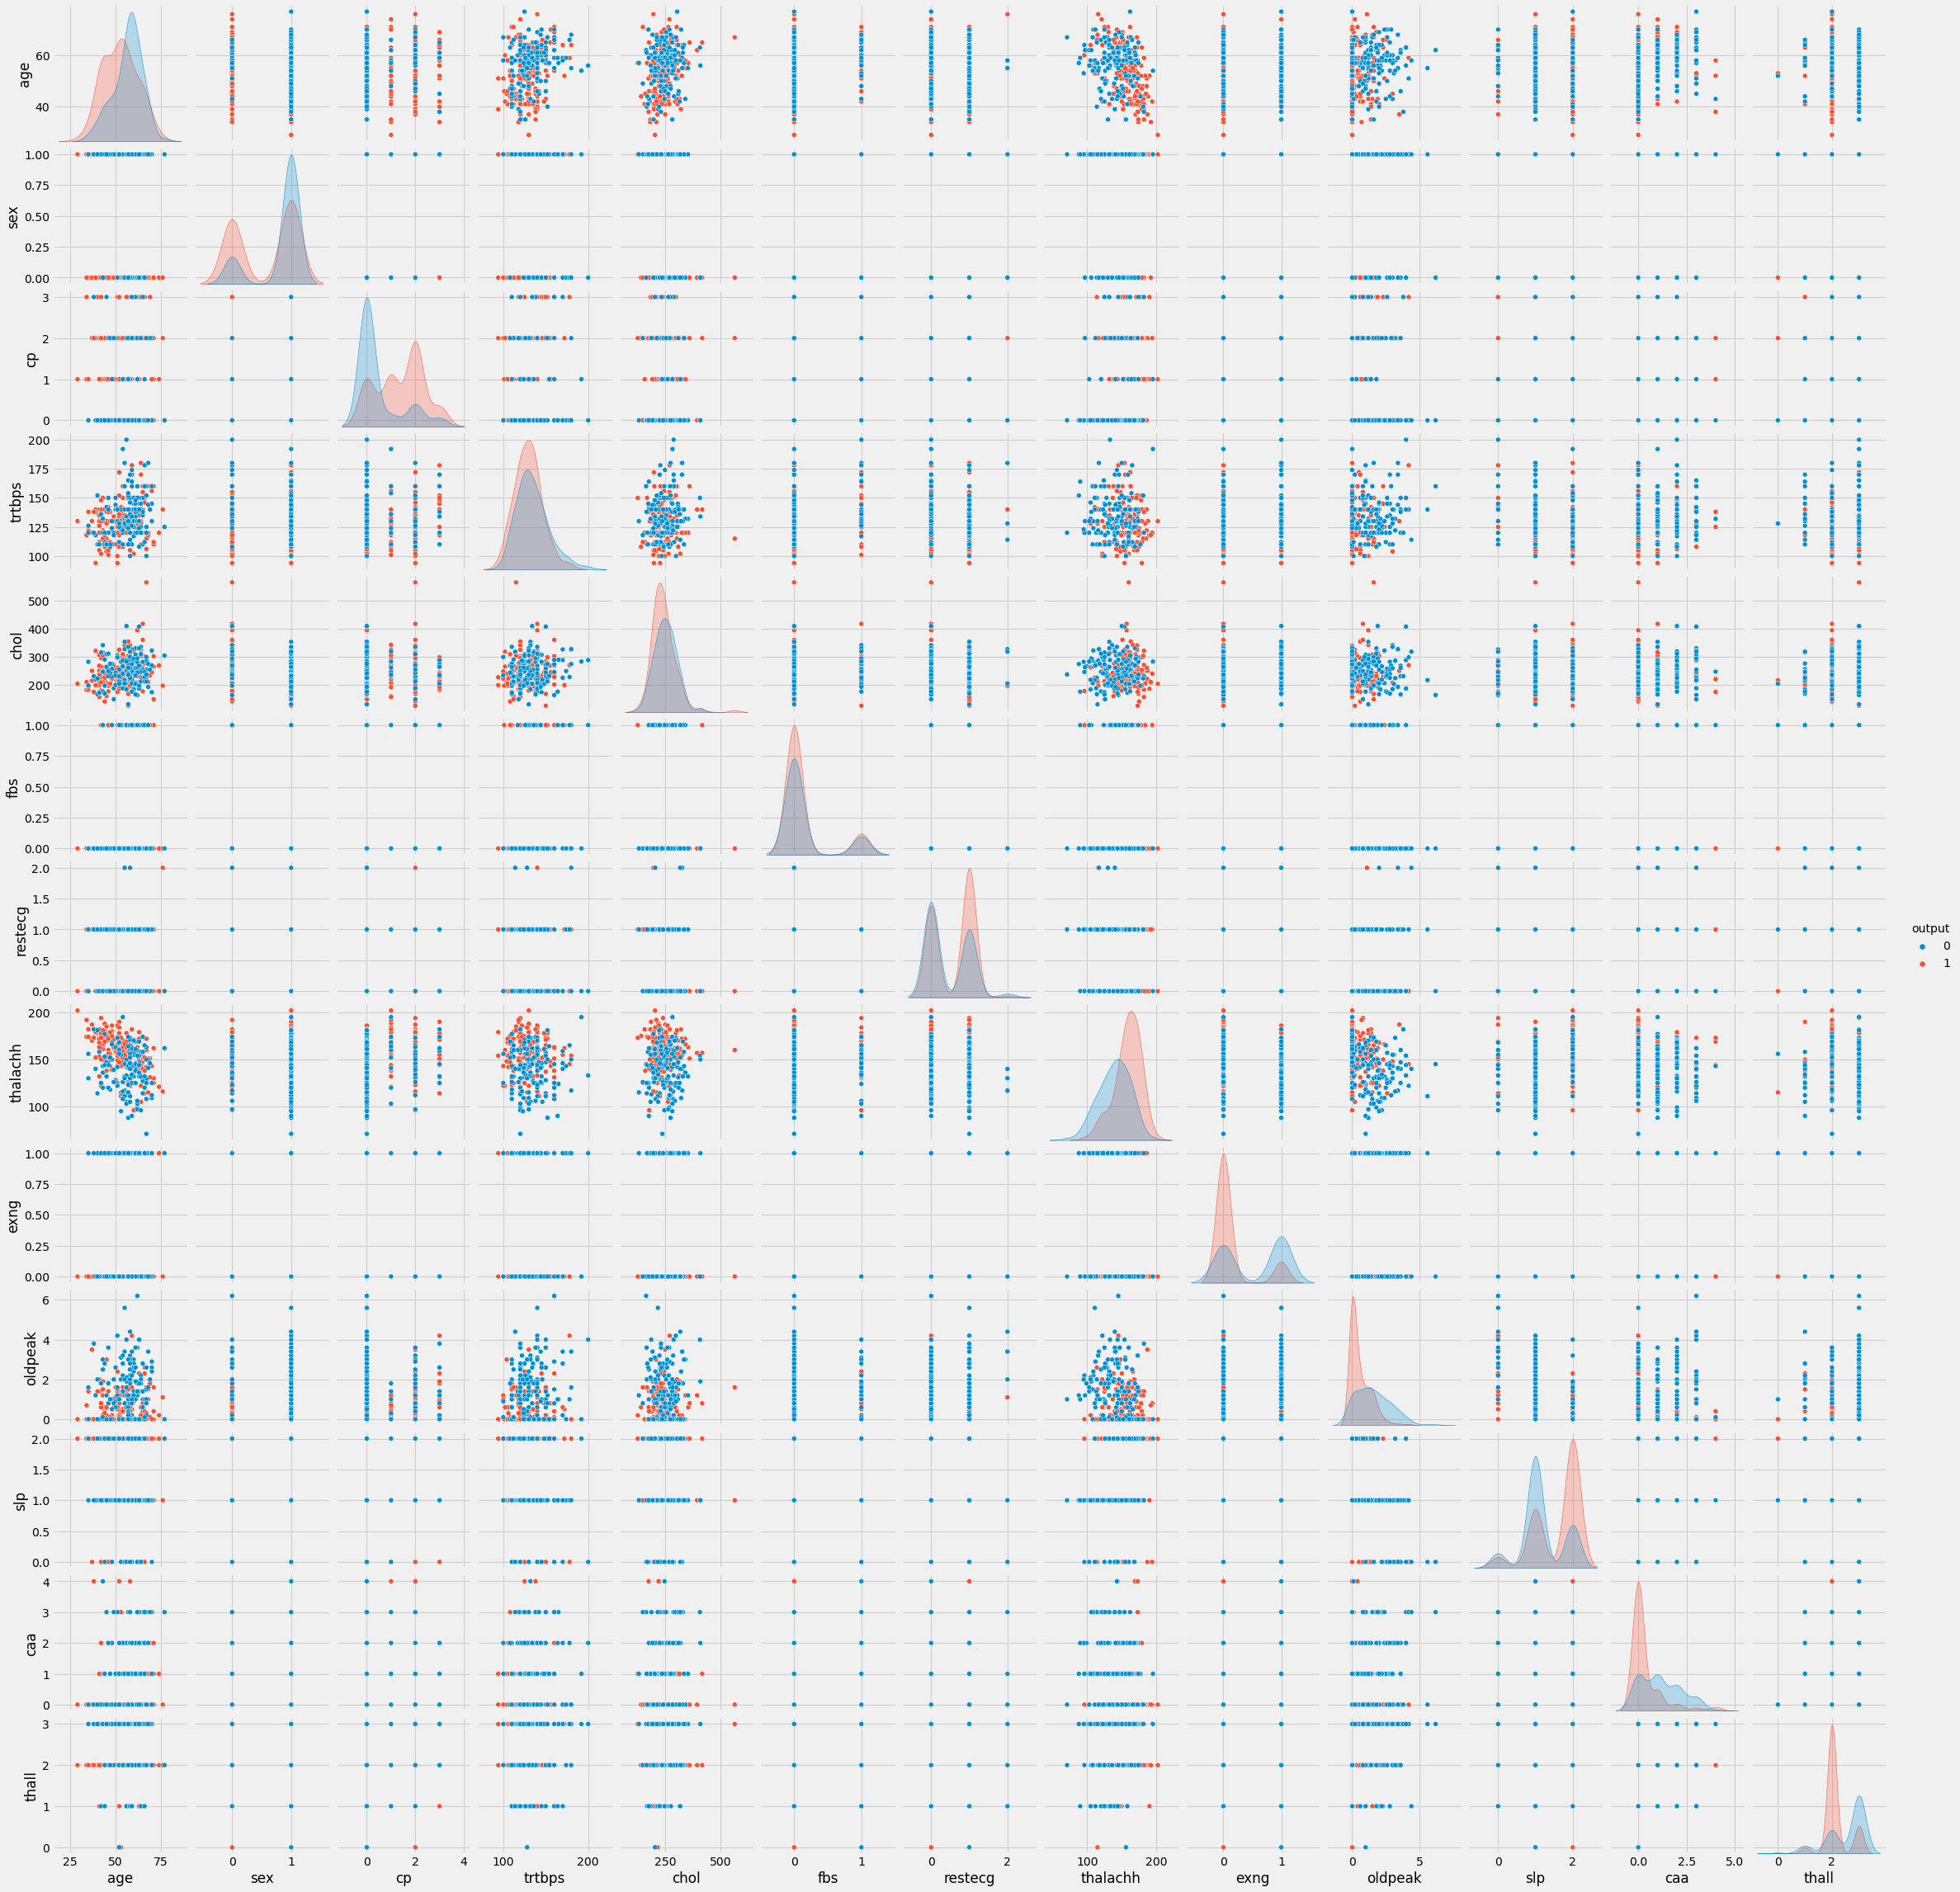

In [ ]:
sns.pairplot(df, hue="output")

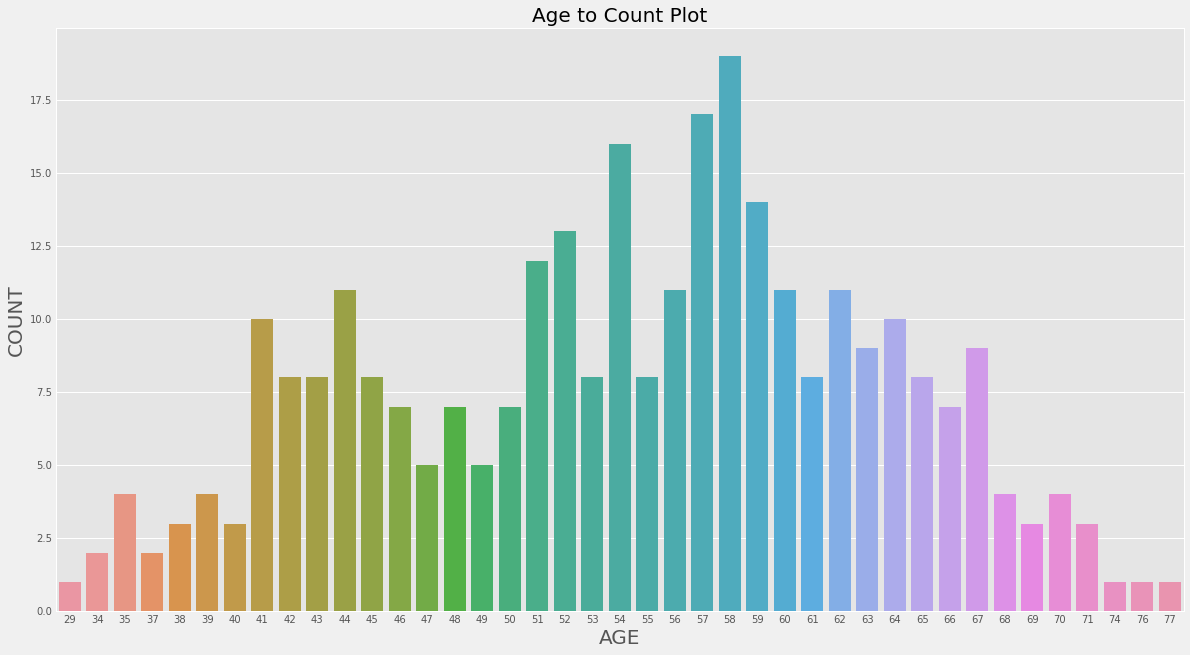

In [ ]:
plt.figure(figsize=(18, 10))
plt.style.use("ggplot")
sns.countplot(x=df["age"]);  # using countplot
plt.title("Age to Count Plot", fontsize=20)
plt.xlabel("AGE", fontsize=20)
plt.ylabel("COUNT", fontsize=20)
plt.show()

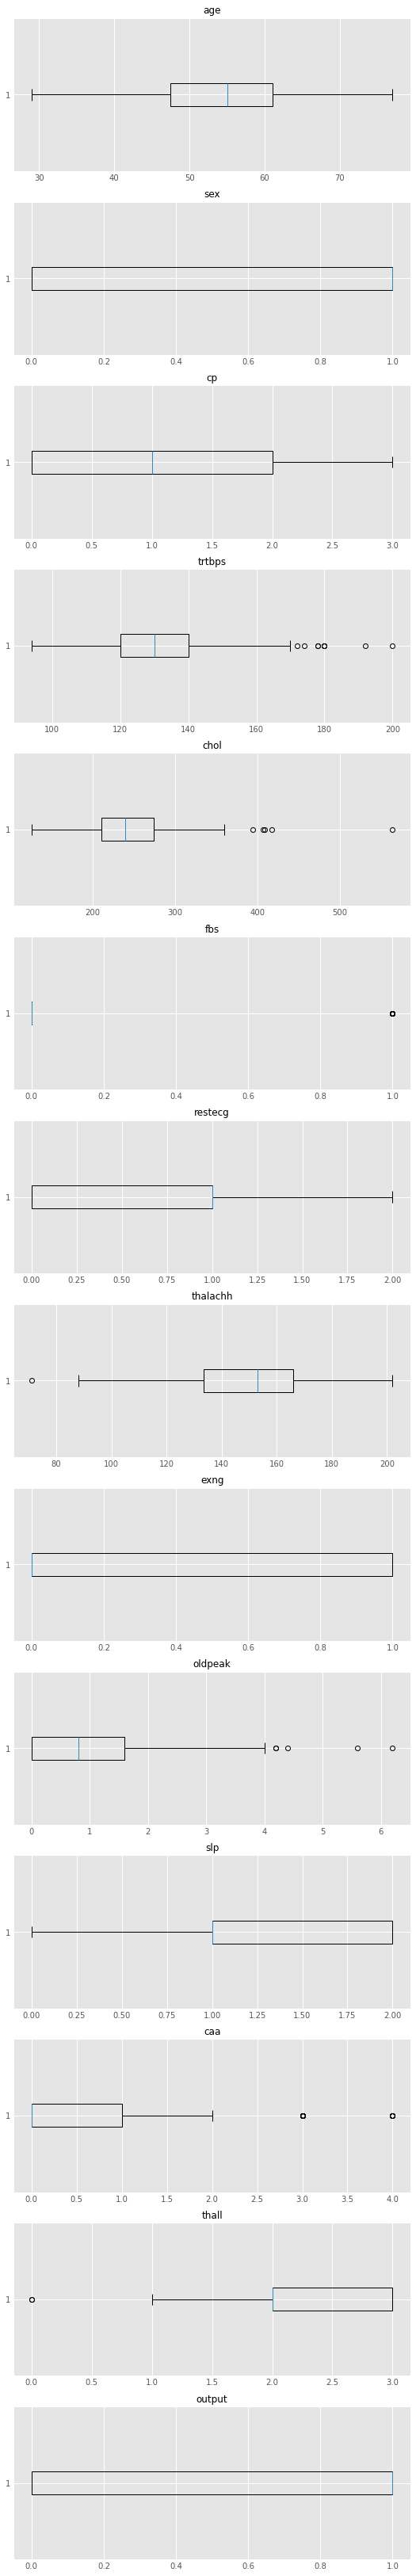

In [ ]:
col = df.columns
fgi, ax = plt.subplots(len(df.columns),1 , figsize = (8,55))
for ind, axi in enumerate(ax.flat):
    axi.boxplot(df[col[ind]], vert = False)
    axi.set_title(col[ind], size = 12)

<AxesSubplot:>

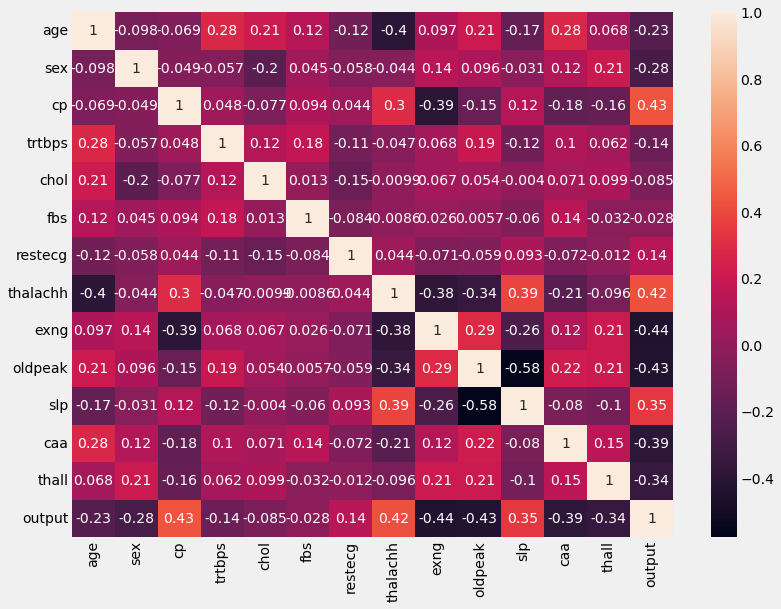

In [ ]:
cor = df.corr()
plt.figure(figsize =  (12,9))
sns.heatmap(cor, annot = True)

In [ ]:
rel = cor['output'].sort_values(ascending = False)
rel

output      1.000000
cp          0.433798
thalachh    0.421741
slp         0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trtbps     -0.144931
age        -0.225439
sex        -0.280937
thall      -0.344029
caa        -0.391724
oldpeak    -0.430696
exng       -0.436757
Name: output, dtype: float64

In [ ]:
l = []
for i in range (len(rel)):
    if rel[i] > 0:
        l.append(rel.index[i])
l

['output', 'cp', 'thalachh', 'slp', 'restecg']

In [ ]:
x = df.iloc[:,:-1]
# x.drop('output', axis = 1, inplace = True)
x.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [ ]:
col = x.columns
std = StandardScaler()
x = std.fit_transform(x)
x = pd.DataFrame(data = x, columns = col)
x.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922


In [ ]:
y = df.loc[:,'output']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: output, dtype: int64

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20, random_state = 42)

Random Forest

In [ ]:
best = 0
esti = 0
best_predict = 0
l = []
for i in range (20, 110):
    rcla = RandomForestClassifier(n_estimators = i)
    rcla.fit(xtrain, ytrain)
    predict = rcla.predict(xtest)
    acu = accuracy_score(predict, ytest)
    l.append(acu)
    if best < acu:
        best = acu
        best_predict = predict

Accuracy using Random Forest is: 88.52459016393442 %


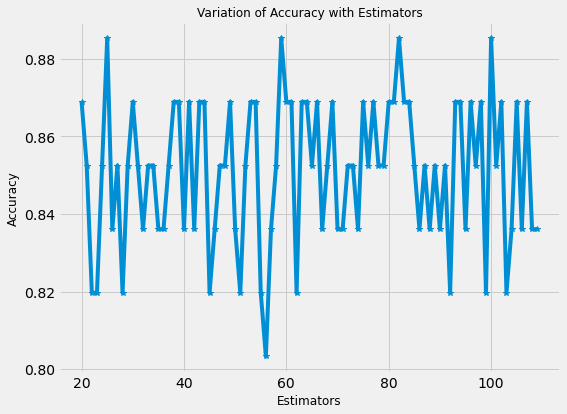

In [ ]:
plt.figure(figsize = (8,6))
plt.plot(range (20 ,110), l, marker = "*")
plt.xlabel("Estimators", size = 12)
plt.ylabel("Accuracy", size = 12)
plt.title("Variation of Accuracy with Estimators", size = 12)
print("Accuracy using Random Forest is: {} %".format(best*100))

AUC value is 0.8849462365591398


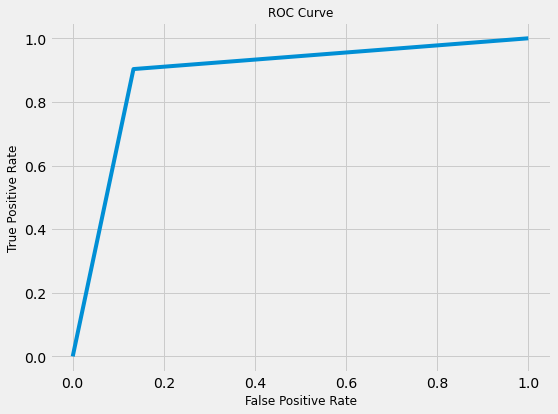

In [ ]:
fpr, tpr, threshould = roc_curve(best_predict, ytest)
plt.figure(figsize = (8, 6))
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate", size = 12)
plt.ylabel("True Positive Rate", size = 12)
plt.title("ROC Curve", size = 12)
print("AUC value is {}".format(auc(fpr, tpr)))

Decision Tree

In [ ]:
dcla = DecisionTreeClassifier()
dcla.fit(xtrain, ytrain)

predict = dcla.predict(xtest)
print("Accuracy using Decision Tree is: {} %".format(accuracy_score(predict, ytest)*100))

Accuracy using Decision Tree is: 80.32786885245902 %


AUC value is 0.8137362637362637


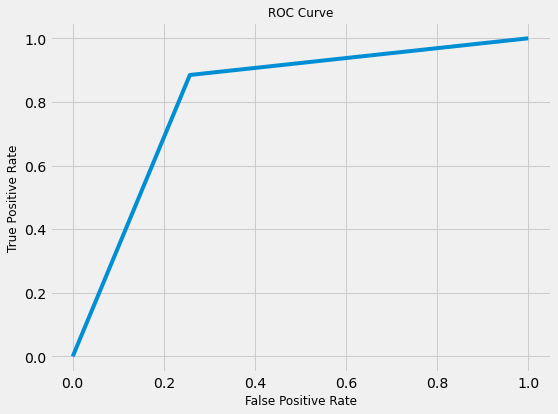

In [ ]:
fpr, tpr, threshould = roc_curve(predict, ytest)
plt.figure(figsize = (8, 6))
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate", size = 12)
plt.ylabel("True Positive Rate", size = 12)
plt.title("ROC Curve", size = 12)
print("AUC value is {}".format(auc(fpr, tpr)))

Logistic Regression

In [ ]:
lcla = LogisticRegression()
lcla.fit(xtrain, ytrain)
predict = lcla.predict(xtest)
print("Accuracy using Logistic Regression is: {} %".format(accuracy_score(predict, ytest)*100))

Accuracy using Logistic Regression is: 85.24590163934425 %


AUC value is 0.8521505376344087


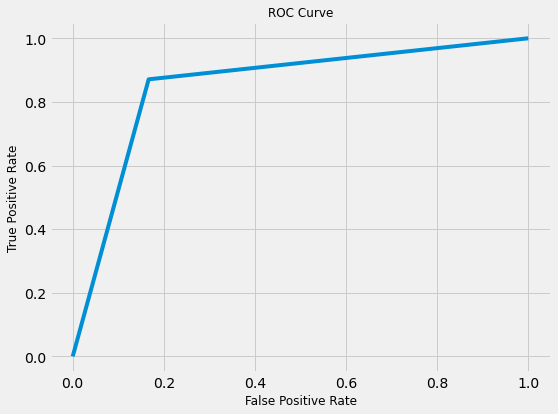

In [ ]:
fpr, tpr, threshould = roc_curve(predict, ytest)
plt.figure(figsize = (8, 6))
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate", size = 12)
plt.ylabel("True Positive Rate", size = 12)
plt.title("ROC Curve", size = 12)
print("AUC value is {}".format(auc(fpr, tpr)))

Support Vector Machine

In [ ]:
scla = SVC()
scla.fit(xtrain, ytrain)
predict = scla.predict(xtest)
print("Accuracy using Support Vector Machine is: {} %".format(accuracy_score(predict, ytest)*100))

Accuracy using Support Vector Machine is: 86.88524590163934 %


AUC value is 0.8693548387096774


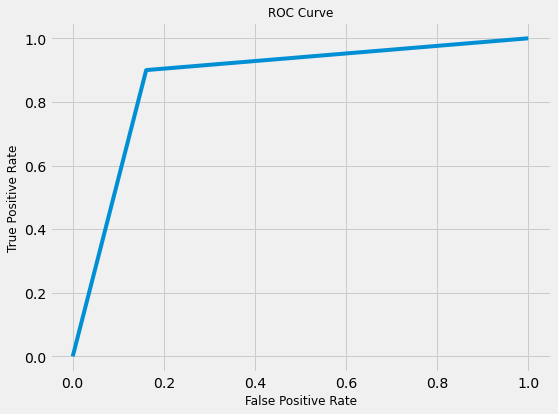

In [ ]:
fpr, tpr, threshould = roc_curve(predict, ytest)
plt.figure(figsize = (8, 6))
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate", size = 12)
plt.ylabel("True Positive Rate", size = 12)
plt.title("ROC Curve", size = 12)
print("AUC value is {}".format(auc(fpr, tpr)))

K Nearest Neighbors

In [ ]:
l = []
maxi = 0
ind = 0
best = 0
best_predict = 0
for i in range (4, 40):
    kcla = KNeighborsClassifier(n_neighbors = i)
    kcla.fit(xtrain, ytrain)
    predict = kcla.predict(xtest)
    acu = accuracy_score(predict, ytest)
    l.append(acu)
    if maxi < acu :
        maxi = acu
        ind = i
        best = acu
        best_predict = predict

Accuracy using K Nearest Neighbors is: 93.44262295081968 %


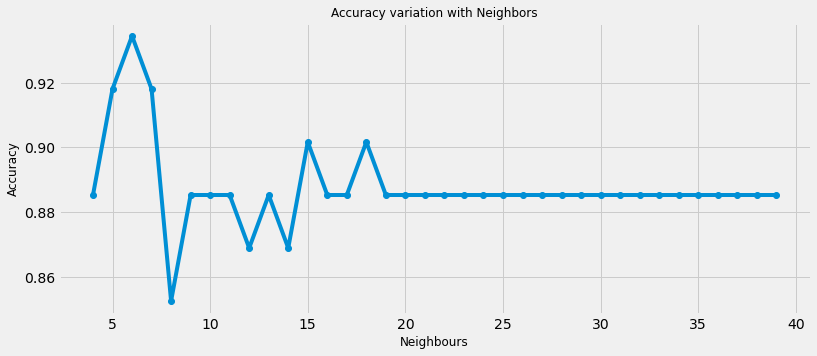

In [ ]:
plt.figure(figsize = (12,5))
plt.plot(range (4, 40), l, marker = 'o')
plt.xlabel('Neighbours', size = 12)
plt.ylabel('Accuracy', size = 12)
plt.title('Accuracy variation with Neighbors', size = 12)
print("Accuracy using K Nearest Neighbors is: {} %".format(best*100))

AUC value is 0.9349462365591398


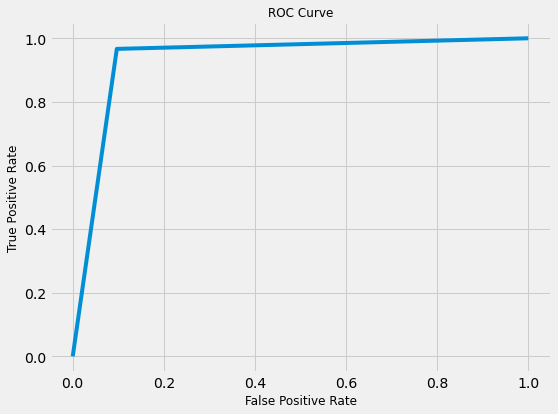

In [ ]:
fpr, tpr, threshould = roc_curve(best_predict, ytest)
plt.figure(figsize = (8, 6))
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate", size = 12)
plt.ylabel("True Positive Rate", size = 12)
plt.title("ROC Curve", size = 12)
print("AUC value is {}".format(auc(fpr, tpr)))

GaussianNB

In [ ]:
gcla = GaussianNB()
gcla.fit(xtrain, ytrain)
predict = gcla.predict_proba(xtest)
predict = np.argmax(predict, axis = 1)
print("Accuracy using GaussianNB is: {} %".format(accuracy_score(predict, ytest)*100))

Accuracy using GaussianNB is: 86.88524590163934 %


AUC value is 0.8693548387096774


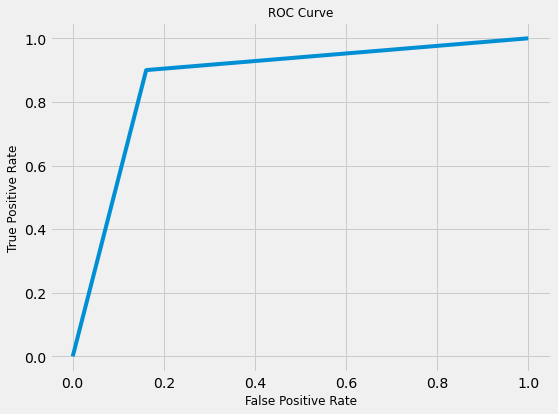

In [ ]:
fpr, tpr, threshould = roc_curve(predict, ytest)
plt.figure(figsize = (8, 6))
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate", size = 12)
plt.ylabel("True Positive Rate", size = 12)
plt.title("ROC Curve", size = 12)
print("AUC value is {}".format(auc(fpr, tpr)))